<a href="https://colab.research.google.com/github/DimaKav/DS-Sprint-01-Dealing-With-Data/blob/master/module4-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [2]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [3]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have twice as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.2 + (time_on_site // 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=34.53906894188046, mobile=True), User(purchased=False, time_on_site=196.33993993256905, mobile=True), User(purchased=False, time_on_site=21.89660305798923, mobile=True), User(purchased=False, time_on_site=266.5945676331252, mobile=True), User(purchased=False, time_on_site=208.00112610567976, mobile=True), User(purchased=False, time_on_site=191.0927793120738, mobile=True), User(purchased=False, time_on_site=62.026045661250414, mobile=True), User(purchased=True, time_on_site=177.43710989095524, mobile=True), User(purchased=False, time_on_site=383.48766695407926, mobile=False), User(purchased=True, time_on_site=223.73224582679913, mobile=True)]


In [27]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head(20)

,purchased,time_on_site,mobile
0,False,34.539069,True
1,False,196.339940,True
2,False,21.896603,True
3,False,266.594568,True
4,False,208.001126,True
5,False,191.092779,True
6,False,62.026046,True
7,True,177.437110,True
8,False,383.487667,False
9,True,223.732246,True


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.2109450715984105,5.464638207539852,5.513221235103223,5.641149731239146,5.74997630784716,5.889838003482058,6.284004561260051,6.829960631216221,7.02578113512759,7.151369999976382,...,581.3393098400824,582.0080169010536,582.0361052263339,582.3490557355324,583.6166002395104,589.1527437334952,589.7271186218869,590.4120394256123,592.1207160828138,595.1646715124776
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
True,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.621, 123.202]","(123.202, 241.192]","(241.192, 359.183]","(359.183, 477.174]","(477.174, 595.165]"
purchased,,,,,
False,258,304,178,43,60
True,60,61,23,7,6


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.621, 123.202]","(123.202, 241.192]","(241.192, 359.183]","(359.183, 477.174]","(477.174, 595.165]"
purchased,,,,,
False,0.811321,0.832877,0.885572,0.86,0.909091
True,0.188679,0.167123,0.114428,0.14,0.090909


In [0]:
# That seems counter to our hypothesis
# More time on the site seems to have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.912,0.82
True,0.088,0.18


In [34]:
series = pd.cut(user_data['time_on_site'], 5)
user_data['bin'] = series

for b in user_data.bin.unique():
  print(user_data[user_data.bin == b].head())

    purchased  time_on_site  mobile               bin
0       False     34.539069    True  (4.452, 123.706]
2       False     21.896603    True  (4.452, 123.706]
6       False     62.026046    True  (4.452, 123.706]
12      False    108.073869    True  (4.452, 123.706]
15      False     61.206240    True  (4.452, 123.706]
   purchased  time_on_site  mobile                 bin
1      False    196.339940    True  (123.706, 242.367]
4      False    208.001126    True  (123.706, 242.367]
5      False    191.092779    True  (123.706, 242.367]
7       True    177.437110    True  (123.706, 242.367]
9       True    223.732246    True  (123.706, 242.367]
    purchased  time_on_site  mobile                 bin
3       False    266.594568    True  (242.367, 361.028]
11      False    326.293655   False  (242.367, 361.028]
19      False    307.116126   False  (242.367, 361.028]
28       True    243.372688    True  (242.367, 361.028]
32      False    286.657038    True  (242.367, 361.028]
    purcha

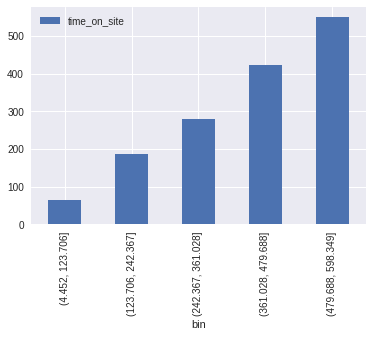

In [35]:
pd.pivot_table(
    user_data, values='time_on_site', index='bin').plot.bar();

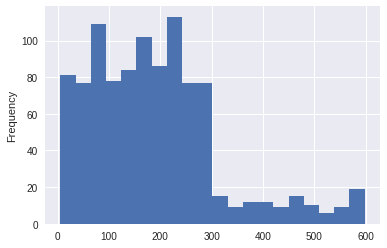

In [36]:
user_data['time_on_site'].plot.hist(bins=20)

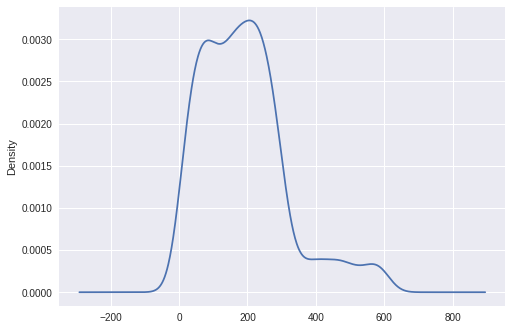

In [31]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once
import matplotlib.pyplot as plt
# Live/stretch goal - how can we do that?



In [37]:
# From Chris Luedtke
user_data['purchased_num'] = user_data['purchased'] * 1
df = user_data.groupby(['mobile', 'bin'])['purchased_num'].mean()
df = df.reset_index()
df

,mobile,bin,purchased_num
0,False,"(4.452, 123.706]",0.127660
1,False,"(123.706, 242.367]",0.034483
2,False,"(242.367, 361.028]",0.075472
3,False,"(361.028, 479.688]",0.125000
4,False,"(479.688, 598.349]",0.045455
5,True,"(4.452, 123.706]",0.177852
6,True,"(123.706, 242.367]",0.201835
7,True,"(242.367, 361.028]",0.152000


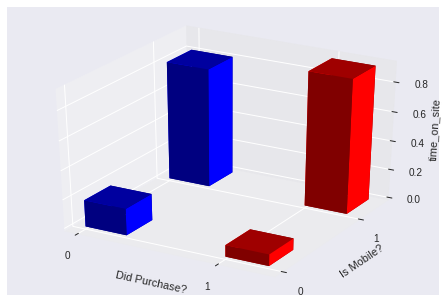

In [32]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns').values

column_names = ['True','False']
row_names = ['True','False']
fig = plt.figure()
ax = Axes3D(fig)

lx= 2 
ly= 2
xpos = np.array([1,0])
ypos = np.array([1,0])
xpos, ypos = np.meshgrid(xpos, ypos)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.3 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['r', 'b'] * ly

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=cs)

ax.axes.set_xticks([1,0])
ax.axes.set_yticks([1,0])
ax.set_xlabel('Did Purchase?')
ax.set_ylabel('Is Mobile?')
ax.set_zlabel('time_on_site')

plt.show()

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [122]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# Tables and visualizations that caputure relationhsips and tell a story
# Confounding relationships

df = pd.read_csv('https://raw.githubusercontent.com/DimaKav/DS-Sprint-01-Dealing-With-Data/master/module4-databackedassertions/persons.csv')

# Drop the extra index column

df = df.drop('Unnamed: 0', axis=1)

# Basic exploration of the data

print('Preview of data: \n',df.head())
print('\nShape of data:',df.shape)
print('\nQuick pearson correlations: \n',df.corr())
print('\nBasic stats: \n',df.describe())
print('\nDtypes with null check:\n')
print(df.info())

Preview of data: 
    age  weight  exercise_time
0   44     118            192
1   41     161             35
2   46     128            220
3   39     216             57
4   28     116            182

Shape of data: (1200, 3)

Quick pearson correlations: 
                     age    weight  exercise_time
age            1.000000  0.144168      -0.273818
weight         0.144168  1.000000      -0.478021
exercise_time -0.273818 -0.478021       1.000000

Basic stats: 
                age       weight  exercise_time
count  1200.000000  1200.000000    1200.000000
mean     48.396667   153.540833     134.910833
std      18.166802    35.132182      85.548895
min      18.000000   100.000000       0.000000
25%      33.000000   125.000000      65.000000
50%      48.000000   149.000000     122.000000
75%      64.000000   180.250000     206.000000
max      80.000000   246.000000     300.000000

Dtypes with null check:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data colu

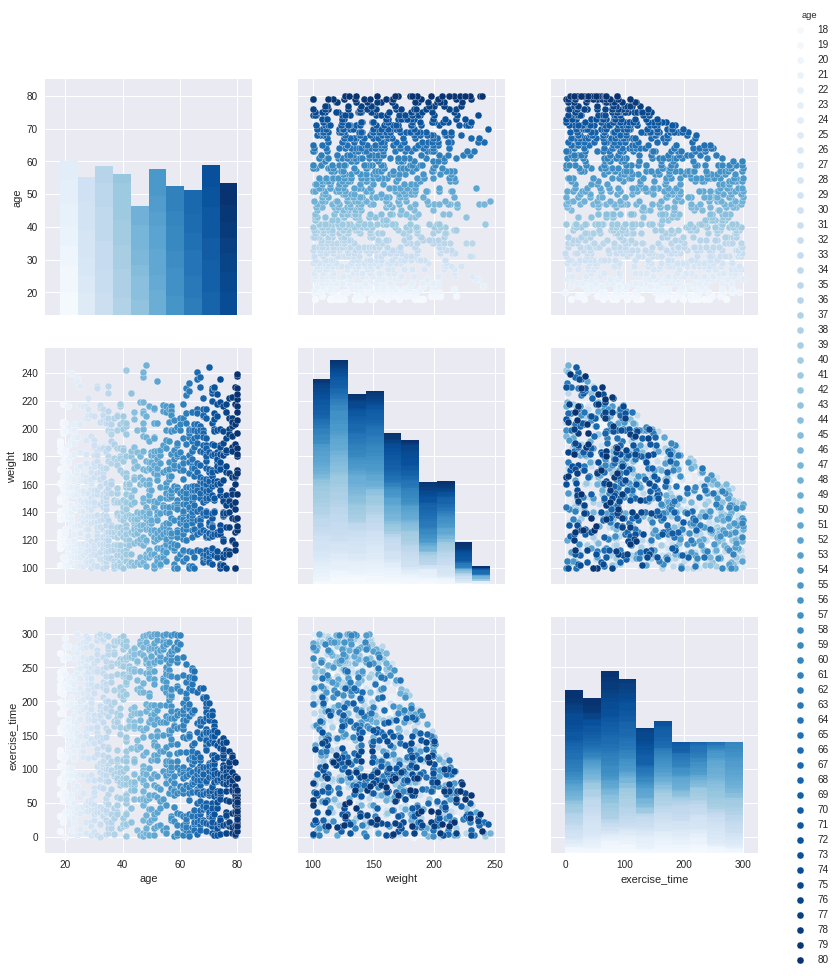

In [109]:
# Figure out which variables are related and which may be confounding

# Explore relationships between variables
import seaborn as sns
# Pairplot visualizing corr
_ = sns.pairplot(df, hue='age', palette="Blues")
_.fig.set_size_inches(12,12)

In [0]:
# See what the 0 exercise time is, it seems weird

df.sort_values(by=['exercise_time']).head(10)

# Get frequency counts of how many people exercised
# Exercise time could be confounding depending on the number
# of people who exercised very little

criteria = [df['exercise_time'].between(0, 30), df['exercise_time'].between(31, 60),
            df['exercise_time'].between(61, 90), df['exercise_time'].between(91, 120),
            df['exercise_time'].between(121, 150), df['exercise_time'].between(151, 180),
            df['exercise_time'].between(181, 210), df['exercise_time'].between(211, 240),
            df['exercise_time'].between(241, 270), df['exercise_time'].between(271, 300)]

# values = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210',
#           '211-240', '241-270', '271-300']
values = [1,2,3,4,5,6,7,8,9,10]

df['exercise_cats'] = np.select(criteria, values)

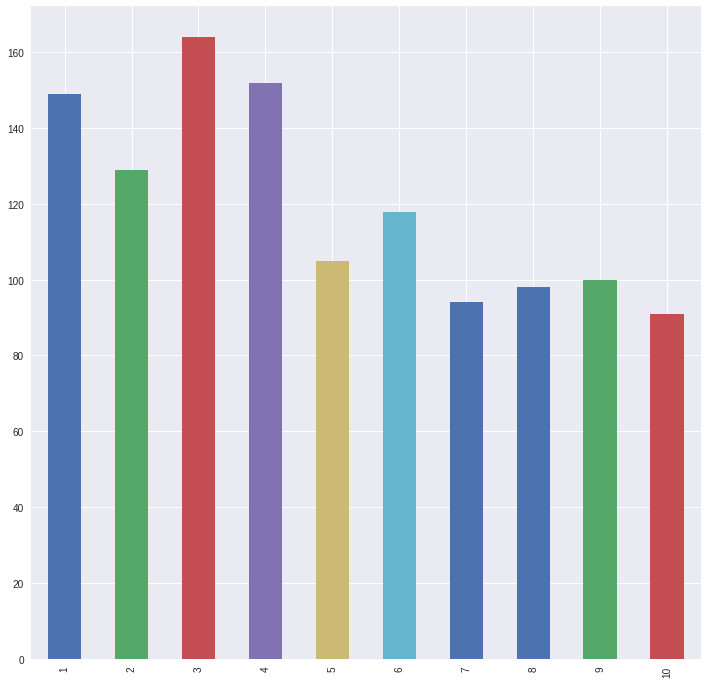

In [201]:
# Barplot of frequencies of time categories

ax = pd.value_counts(dfs.exercise_cats, sort=False).plot.bar()

# Plot legend is x = values in the above code corresponding to the criteria in the
# list in the code block above, y = number of people

# This plot let's us see that a significant amount of people exercised very little
# Next step would be to check what groups (by time) benefited the most from exercise
# in terms of weight.



### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

Age is discrete, weight is continuous, exercise time is continous as well.

2.  What are the relationships between the variables?

Exercise time and weight. Older people of age 70 and older exercised much less compared to everyone else. 

3.  Which relationships are "real", and which spurious?

Exercise time and weight loss could be counfounding for all age groups because there aren't an even amount of people at each exercise time.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspierd by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)